<a href="https://colab.research.google.com/github/mohammedhemed77/DL-Course-UDL-Book-Based-/blob/main/Implementations/Notebooks/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CH (9) **Regularization** :
In this Notebook we cover some ways to prevent one of the biggest problems in nueral nets `Overfitting`

1 - **L2 Regularization**

2 - **Early Stop**

3 - **Dropout**

4 - **Data Augmentation**  

### **by** **Eng** **`Mohammed Hemed`**

#### Install MNIST 1D repository

In [ ]:
# Install MNIST 1D repository
%pip install git+https://github.com/greydanus/mnist1d

  Cloning https://github.com/greydanus/mnist1d to /tmp/pip-req-build-9rebc1st
  Running command git clone --filter=blob:none --quiet https://github.com/greydanus/mnist1d /tmp/pip-req-build-9rebc1st
  Resolved https://github.com/greydanus/mnist1d to commit 7878d96082abd200c546a07a4101fa90b30fdf7e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# import libraries

In [ ]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import mnist1d
from sklearn.model_selection import train_test_split
import random

####Generate training and test dataset using the MNIST1D code.
  The dataset gets saved as a .pkl file so it doesn't have to be regenerated each time.

In [ ]:
args = mnist1d.data.get_dataset_args()
data = mnist1d.data.get_dataset(args, path='./mnist1d_data.pkl', download=False, regenerate=False)

Successfully loaded data from ./mnist1d_data.pkl


#### Some insghts about MNIST-1ddataset

In [ ]:
print("Training Data Shape:", data['x'].shape,type(data['x']))
print("Training Labels Shape:", data['y'].shape,type(data['y']))
print("Test Data Shape:", data['x_test'].shape,type(data['x_test']))
print("Test Labels Shape:", data['y_test'].shape,type(data['y_test']))

Training Data Shape: (4000, 40) <class 'numpy.ndarray'>
Training Labels Shape: (4000,) <class 'numpy.ndarray'>
Test Data Shape: (1000, 40) <class 'numpy.ndarray'>
Test Labels Shape: (1000,) <class 'numpy.ndarray'>


### 📌 why large Weights make the model more complex ?

Large Weights Make Activations Saturate :

When weights in a neural network are too large, they cause activations (especially in non-linear functions like Sigmoid and Tanh) to enter their saturation regions, where gradients become very small (almost zero). This leads to the vanishing gradient problem and slows down learning.



###  Sigmoid Activation Function

The Sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Its derivative is:

$$
\sigma'(z) = \sigma(z) (1 - \sigma(z))
$$


###  Understanding Saturation:
- When \( z \) is **very large** (e.g., \( z = 1000 \)):
  $$
  \sigma(1000) \approx 1
  $$
- When \( z \) is **very small** (e.g., \( z = -1000 \)):
  $$
  \sigma(-1000) \approx 0
  $$

**Why is this bad?**  
- When
$
\sigma(z)
$
 is close to **0** or **1**, its derivative
$
\sigma'(z) \approx 0
$

- This leads to **vanishing gradients**, slowing down backpropagation.  


## **L2 Regularization (Weight Decay)**  

The **L2 regularized loss function** is:  

$$
\mathcal{L} = \mathcal{L}_{\text{data}} + \frac{\lambda}{2} \sum_{i} w_i^2
$$
Where:  
- $ \mathcal{L}_{\text{data}} $ is the original loss function (e.g., Cross-Entropy for classification, MSE for regression).  
- $ \lambda $ is the **regularization strength** (hyperparameter controlling the penalty).  
- $ w_i $ are the model parameters (weights).  
- The term $ \sum_{i} w_i^2 $ is the **sum of squared weights**.




### **Gradient of L2 Regularization**  

The gradient of the L2 penalty is:  

$$
\frac{\partial \mathcal{L}}{\partial w_i} = \frac{\partial \mathcal{L}_{\text{data}}}{\partial w_i} + \lambda w_i
$$

This modifies the weight update in gradient descent as follows:  

$$
w_i \leftarrow w_i - \alpha \left( \frac{\partial \mathcal{L}_{\text{data}}}{\partial w_i} + \lambda w_i \right)
$$

$$
w_i \leftarrow w_i (1 - \lambda \alpha) - \alpha \frac{\partial \mathcal{L}_{\text{data}}}{\partial w_i}
$$

### Example :
let
$\alpha \frac{\partial \mathcal{L}_{\text{data}}}{\partial w_i}$
is contatnt C,
$w_1$ = 10,000 , $w_2$ = 10

$\alpha$ = 0.01 , $\lambda$ = 0.001

After one iteration :   

$w_1$ = 10,000 * (0.99) - C
      = 9900 - C

$w_2$ = 10 * (0.99) - C
      = 9.9 - C




### **Effect of L2 Regularization**  

- The term \( 2$\lambda$ $w_i$ \) **shrinks the weights** during training.  
- Large weights get **penalized more**, forcing the model to **prefer smaller weights**.  
- This reduces **overfitting**, as smaller weights lead to a simpler model.  



### **How to Use in PyTorch**  

In PyTorch, L2 regularization can be added via `weight_decay` in the optimizer:  

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)


### L2 Regularization (Full batch)

Epoch 0 | Train Loss: 2.3227 | Val Loss: 2.1130
Epoch 10 | Train Loss: 1.6163 | Val Loss: 1.6332
Epoch 20 | Train Loss: 1.4424 | Val Loss: 1.4765
Epoch 30 | Train Loss: 1.2497 | Val Loss: 1.3142
Epoch 40 | Train Loss: 1.1298 | Val Loss: 1.2225
Epoch 50 | Train Loss: 1.0745 | Val Loss: 1.1897
Epoch 60 | Train Loss: 1.0494 | Val Loss: 1.1742
Epoch 70 | Train Loss: 1.0354 | Val Loss: 1.1630
Epoch 80 | Train Loss: 1.0274 | Val Loss: 1.1600
Epoch 90 | Train Loss: 1.0237 | Val Loss: 1.1550
Epoch 100 | Train Loss: 1.0177 | Val Loss: 1.1502
Epoch 110 | Train Loss: 1.0139 | Val Loss: 1.1495
Epoch 120 | Train Loss: 1.0114 | Val Loss: 1.1470
Epoch 130 | Train Loss: 1.0097 | Val Loss: 1.1472
Epoch 140 | Train Loss: 1.0082 | Val Loss: 1.1450
Epoch 150 | Train Loss: 1.0065 | Val Loss: 1.1463
Epoch 160 | Train Loss: 1.0057 | Val Loss: 1.1441
Epoch 170 | Train Loss: 1.0051 | Val Loss: 1.1455
Epoch 180 | Train Loss: 1.0038 | Val Loss: 1.1434
Epoch 190 | Train Loss: 1.0032 | Val Loss: 1.1447

Test Accur

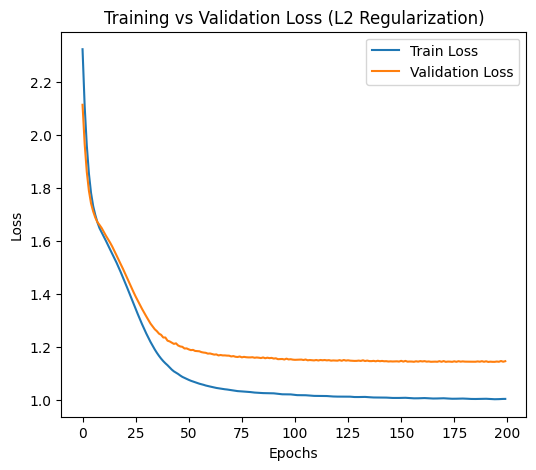

In [ ]:
# Convert to tensors
x_full = torch.tensor(data['x'], dtype=torch.float32)
y_full = torch.tensor(data['y'], dtype=torch.int64)
x_test = torch.tensor(data['x_test'], dtype=torch.float32)
y_test = torch.tensor(data['y_test'], dtype=torch.int64)

# Train-validation split (80%-20%)
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(40, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)  # No Softmax, handled by CrossEntropyLoss

# Training function
def train_model(hidden_size, lr,l2_lambda ,epochs=200):
    model = SimpleNN(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr , weight_decay=l2_lambda)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        train_output = model(x_train)
        loss = criterion(train_output, y_train)
        loss.backward()
        optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            val_output = model(x_val)
            val_loss = criterion(val_output, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

    return model, train_losses, val_losses

# Hyperparameters
hidden_size = 256
learning_rate = 0.01
l2_lambda = 0.01 # L2 regularization (weight decay)

# Train the model
model, train_loss, val_loss = train_model(hidden_size, learning_rate, l2_lambda)

# Evaluate on test set
def evaluate_model(model, x, y):
    model.eval()
    with torch.no_grad():
        predictions = model(x).argmax(1)
        accuracy = (predictions == y).float().mean().item()
    return accuracy

test_acc = evaluate_model(model, x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# print (model.state_dict())
# Plot training vs validation loss
plt.figure(figsize=(6, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
if l2_lambda == 0:
    plt.title("Training vs Validation Loss without regularization")
else:
    plt.title("Training vs Validation Loss (L2 Regularization)")
plt.show()


### L2 Regularization (mini batch SGD)

Epoch 10/200 | Train Loss: 1.2491 | Val Loss: 1.2420
Epoch 20/200 | Train Loss: 1.1747 | Val Loss: 1.1963
Epoch 30/200 | Train Loss: 1.1763 | Val Loss: 1.1911
Epoch 40/200 | Train Loss: 1.1530 | Val Loss: 1.1745
Epoch 50/200 | Train Loss: 1.1546 | Val Loss: 1.2053
Epoch 60/200 | Train Loss: 1.1635 | Val Loss: 1.1739
Epoch 70/200 | Train Loss: 1.1494 | Val Loss: 1.1749
Epoch 80/200 | Train Loss: 1.1462 | Val Loss: 1.1692
Epoch 90/200 | Train Loss: 1.1444 | Val Loss: 1.1588
Epoch 100/200 | Train Loss: 1.1422 | Val Loss: 1.1736
Epoch 110/200 | Train Loss: 1.1379 | Val Loss: 1.1671
Epoch 120/200 | Train Loss: 1.1392 | Val Loss: 1.1907
Epoch 130/200 | Train Loss: 1.1454 | Val Loss: 1.1744
Epoch 140/200 | Train Loss: 1.1387 | Val Loss: 1.1910
Epoch 150/200 | Train Loss: 1.1444 | Val Loss: 1.1748
Epoch 160/200 | Train Loss: 1.1433 | Val Loss: 1.1729
Epoch 170/200 | Train Loss: 1.1374 | Val Loss: 1.1744
Epoch 180/200 | Train Loss: 1.1467 | Val Loss: 1.1584
Epoch 190/200 | Train Loss: 1.1392 | 

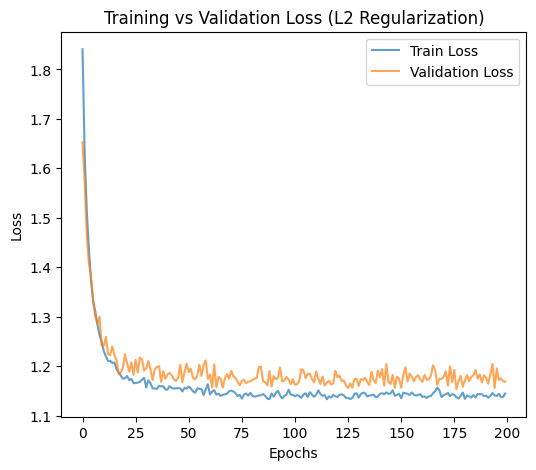

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert data to tensors
x_full = torch.tensor(data['x'], dtype=torch.float32)
y_full = torch.tensor(data['y'], dtype=torch.int64)
x_test = torch.tensor(data['x_test'], dtype=torch.float32)
y_test = torch.tensor(data['y_test'], dtype=torch.int64)

# Train-validation split (80%-20%)
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataLoaders
batch_size = 100
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(40, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)  # No Softmax, handled by CrossEntropyLoss

# Training function
def train_model(hidden_size, lr, l2_lambda, num_epochs=80):
    model = SimpleNN(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2_lambda)

    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        # Validation step
        model.eval()
        with torch.no_grad():
            epoch_val_loss = sum(criterion(model(batch_x), batch_y).item() for batch_x, batch_y in val_loader) / len(val_loader)
        val_losses.append(epoch_val_loss)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

    return model, train_losses, val_losses

# Hyperparameters
hidden_size = 256
learning_rate = 0.01
l2_lambda = 0.01 # L2 regularization (weight decay)
num_epochs = 200

# Train the model
model, train_loss, val_loss = train_model(hidden_size, learning_rate, l2_lambda, num_epochs)

# Evaluate on test set
def evaluate_model(model, x, y):
    model.eval()
    with torch.no_grad():
        predictions = model(x).argmax(1)
        accuracy = (predictions == y).float().mean().item()
    return accuracy

test_acc = evaluate_model(model, x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training vs validation loss
plt.figure(figsize=(6, 5))
plt.plot(train_loss, label="Train Loss", alpha=0.7)
plt.plot(val_loss, label="Validation Loss", alpha=0.7)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (L2 Regularization)")
plt.show()


### Using Early stop to prevevt overfitting

Epoch 10/200 | Train Loss: 1.2359 | Val Loss: 1.1344
Epoch 20/200 | Train Loss: 1.0914 | Val Loss: 1.0761
Epoch 30/200 | Train Loss: 1.0264 | Val Loss: 1.0319
Epoch 40/200 | Train Loss: 1.0041 | Val Loss: 1.0397
Epoch 50/200 | Train Loss: 0.9806 | Val Loss: 1.0183
Epoch 60/200 | Train Loss: 0.9212 | Val Loss: 1.0030
Early stopping triggered at epoch 69

Test Accuracy: 62.10%


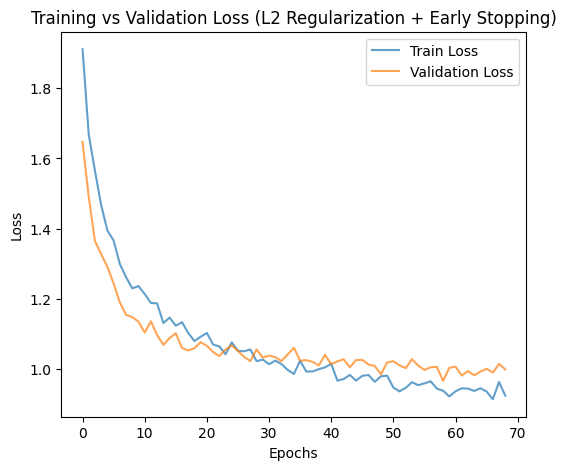

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, dropout_prob=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(40, hidden_size)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        return self.fc2(x)
# Train-validation split (80%-20%)
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataLoaders
batch_size = 100
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training function with early stopping
def train_model(hidden_size, lr, l2_lambda, num_epochs=80, patience=10, dropout_prob=0.5):
    model = SimpleNN(hidden_size, dropout_prob)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2_lambda)

    train_losses, val_losses = [], []
    min_val_loss = np.inf
    patience_counter = 0
    best_model_state = model.state_dict()  # Initialize best model state

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        # Validation step
        model.eval()
        with torch.no_grad():
            epoch_val_loss = sum(criterion(model(batch_x), batch_y).item() for batch_x, batch_y in val_loader) / len(val_loader)
        val_losses.append(epoch_val_loss)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

        # Early stopping check
        if epoch_val_loss < min_val_loss:
            min_val_loss = epoch_val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

    # Load the best model state
    model.load_state_dict(best_model_state)
    return model, train_losses, val_losses

# Hyperparameters
hidden_size = 256
learning_rate = 0.01
l2_lambda = 0.001
num_epochs = 200
patience = 10

# Train the model with early stopping
model, train_loss, val_loss = train_model(hidden_size, learning_rate, l2_lambda, num_epochs, patience)

# Evaluate on test set
def evaluate_model(model, x, y):
    model.eval()
    with torch.no_grad():
        predictions = model(x).argmax(1)
        accuracy = (predictions == y).float().mean().item()
    return accuracy

test_acc = evaluate_model(model, x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training vs validation loss
plt.figure(figsize=(6, 5))
plt.plot(train_loss, label="Train Loss", alpha=0.7)
plt.plot(val_loss, label="Validation Loss", alpha=0.7)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (L2 Regularization + Early Stopping)")
plt.show()


### Dropout
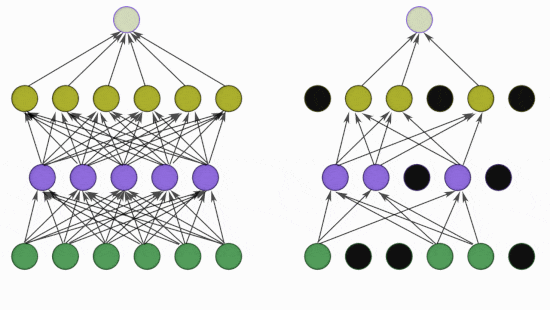

#### Inverted Dropout from scratch code

In [ ]:
import torch

# Function to apply inverted dropout on a weight matrix
def apply_inverted_dropout(W, p=0.5):
    """
    Apply inverted dropout to a given weight matrix.

    Args:
        W (torch.Tensor): The weight matrix to apply dropout to.
        p (float): Dropout probability (0.0 < p < 1.0).

    Returns:
        torch.Tensor: The weight matrix after applying inverted dropout.
        torch.Tensor: The dropout mask.
    """
    # Generate dropout mask (1 with probability 1-p, 0 with probability p)
    mask = (torch.rand_like(W) > p).float()

    # Apply dropout (zeroing out dropped elements)
    W_dropped = W * mask

    # Apply inverted dropout scaling (scale by 1 / (1 - p))
    W_inverted_dropout = W_dropped / (1 - p)

    return W, mask, W_dropped, W_inverted_dropout

# Set a random seed for reproducibility
torch.manual_seed(42)

# Step 1: Create a weight matrix (3x3) initialized with a constant value
W = torch.full((3, 3), 5.0)

# Print the original weight matrix
print("Step 1: Original Weight Matrix W:")
print(W)

# Compute sum of original weights
sum_W_original = W.sum().item()
print(f"\nSum of all elements in W before dropout: {sum_W_original}")

# Step 2: Define dropout probability
p = 0.5
print(f"\nStep 2: Dropout probability p = {p}")

# Apply inverted dropout and get results
W_original, mask, W_dropped, W_inverted_dropout = apply_inverted_dropout(W, p)

# Step 3: Print the dropout mask (after it is generated)
print("\nStep 3: Dropout Mask (Binary, 0 = dropped neuron, 1 = kept neuron):")
print(mask)

# Compute sum after applying dropout mask
sum_W_dropped = W_dropped.sum().item()
print(f"\nSum of all elements in W after standard dropout (before scaling): {sum_W_dropped}")

# Step 4: Print the weight matrix after applying the dropout mask (before scaling)
print("\nStep 4: Weight Matrix After Applying Dropout Mask (Zeroed Out Weights):")
print(W_dropped)

# Step 5: Print the weight matrix after scaling by 1/(1-p)
print("\nStep 5: Weight Matrix After Inverted Dropout (Scaled by 1/(1-p)):")
print(W_inverted_dropout)

# Compute sum after applying inverted dropout scaling
sum_W_inverted_dropout = W_inverted_dropout.sum().item()
print(f"\nSum of all elements in W after inverted dropout (scaled by 1/(1-p)): {sum_W_inverted_dropout}")


Step 1: Original Weight Matrix W:
tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])

Sum of all elements in W before dropout: 45.0

Step 2: Dropout probability p = 0.5

Step 3: Dropout Mask (Binary, 0 = dropped neuron, 1 = kept neuron):
tensor([[1., 1., 0.],
        [1., 0., 1.],
        [0., 1., 1.]])

Sum of all elements in W after standard dropout (before scaling): 30.0

Step 4: Weight Matrix After Applying Dropout Mask (Zeroed Out Weights):
tensor([[5., 5., 0.],
        [5., 0., 5.],
        [0., 5., 5.]])

Step 5: Weight Matrix After Inverted Dropout (Scaled by 1/(1-p)):
tensor([[10., 10.,  0.],
        [10.,  0., 10.],
        [ 0., 10., 10.]])

Sum of all elements in W after inverted dropout (scaled by 1/(1-p)): 60.0


## Dropout using dropout layer in **pytorch**

In [ ]:
import torch
import torch.nn as nn

# Set random seed for reproducibility
torch.manual_seed(42)

# Create a simple input tensor (2x5 matrix)
X = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0],
                  [6.0, 7.0, 8.0, 9.0, 10.0]])

# Define dropout layer with p=0.5
dropout_layer = nn.Dropout(p=0.5)

# Apply dropout during "training" mode
X_dropped = dropout_layer(X)

# Print results
print("\nOriginal Input Tensor:")
print(X)

print("\n sum of x Elements :")
print(X_dropped.sum().item())


print("\nAfter Applying Dropout (p=0.5):")
print(X_dropped)

print("\n sum of X_dropped Elements : ")
print(X_dropped.sum().item())



Original Input Tensor:
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])

 sum of x Elements :
68.0

After Applying Dropout (p=0.5):
tensor([[ 0.,  0.,  6.,  8., 10.],
        [12., 14.,  0., 18.,  0.]])

 sum of X_dropped Elements : 
68.0


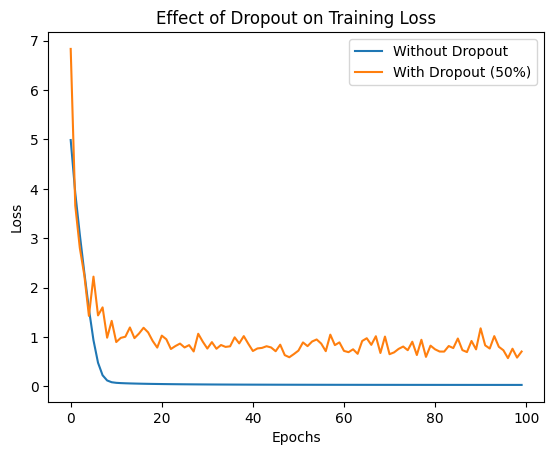

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Create sample dataset
torch.manual_seed(42)
x = torch.randn(100, 1)
y = 2 * x + 1 + 0.2 * torch.randn(100, 1)  # y = 2x + 1 with noise

# Define simple NN with and without Dropout
class SimpleNN(nn.Module):
    def __init__(self, dropout_rate=0.0):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout only during training
        return self.fc2(x)

# Train function
def train_model(model, x, y, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

# Train models with and without Dropout
model_no_dropout = SimpleNN(dropout_rate=0.0)
model_with_dropout = SimpleNN(dropout_rate=0.5)

loss_no_dropout = train_model(model_no_dropout, x, y)
loss_with_dropout = train_model(model_with_dropout, x, y)

# Plot results
plt.plot(loss_no_dropout, label="Without Dropout")
plt.plot(loss_with_dropout, label="With Dropout (50%)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of Dropout on Training Loss")
plt.show()


### Dropout effect on MNIST-1D


Training model **WITH** dropout (p=0.5):
Epoch 10/200 | Train Loss: 1.1923 | Val Loss: 1.1081
Epoch 20/200 | Train Loss: 0.9959 | Val Loss: 1.0585
Epoch 30/200 | Train Loss: 0.8791 | Val Loss: 1.0526
Epoch 40/200 | Train Loss: 0.7998 | Val Loss: 1.0230
Epoch 50/200 | Train Loss: 0.7567 | Val Loss: 1.0626
Epoch 60/200 | Train Loss: 0.7112 | Val Loss: 1.0312
Epoch 70/200 | Train Loss: 0.6568 | Val Loss: 1.0429
Epoch 80/200 | Train Loss: 0.6251 | Val Loss: 1.0652
Epoch 90/200 | Train Loss: 0.6080 | Val Loss: 1.0682
Epoch 100/200 | Train Loss: 0.5748 | Val Loss: 1.1222
Epoch 110/200 | Train Loss: 0.5401 | Val Loss: 1.1776
Epoch 120/200 | Train Loss: 0.5241 | Val Loss: 1.1654
Epoch 130/200 | Train Loss: 0.4997 | Val Loss: 1.1435
Epoch 140/200 | Train Loss: 0.5011 | Val Loss: 1.2933
Epoch 150/200 | Train Loss: 0.4986 | Val Loss: 1.3315
Epoch 160/200 | Train Loss: 0.4897 | Val Loss: 1.2518
Epoch 170/200 | Train Loss: 0.4812 | Val Loss: 1.3357
Epoch 180/200 | Train Loss: 0.4677 | Val Loss: 1.

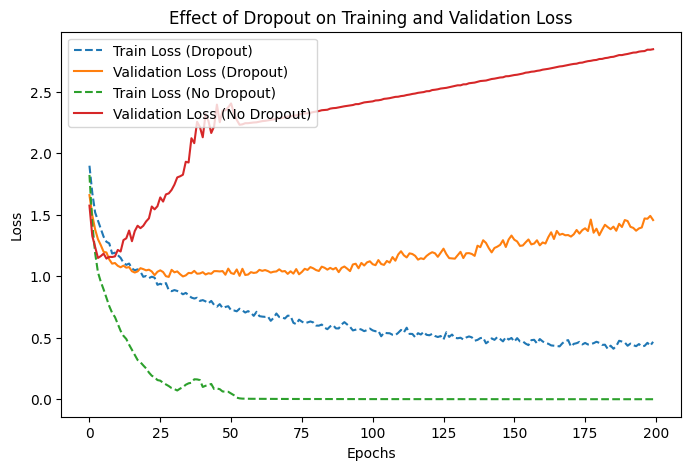


Test Accuracy with Dropout: 65.40%
Test Accuracy without Dropout: 61.20%


In [ ]:
# Train-validation split (80%-20%)
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataLoaders
batch_size = 100
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(x_test, y_test), batch_size=batch_size, shuffle=False)

# Define the neural network with dropout
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, dropout_prob=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(40, hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer
        self.fc2 = nn.Linear(hidden_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        return self.fc2(x)  # No Softmax (handled by CrossEntropyLoss)

# Training function
def train_model(hidden_size, lr, dropout_prob, num_epochs=80):
    model = SimpleNN(hidden_size, dropout_prob)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)  # No L2 regularization

    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation step
        model.eval()
        with torch.no_grad():
            epoch_val_loss = sum(criterion(model(batch_x), batch_y).item() for batch_x, batch_y in val_loader) / len(val_loader)
        val_losses.append(epoch_val_loss)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {epoch_val_loss:.4f}")

    return model, train_losses, val_losses

# Hyperparameters
hidden_size = 256
learning_rate = 0.01
num_epochs = 200

# Train two models: one with dropout, one without
print("\nTraining model **WITH** dropout (p=0.5):")
model_with_dropout, train_loss_dropout, val_loss_dropout = train_model(hidden_size, learning_rate, dropout_prob=0.5, num_epochs=num_epochs)

print("\nTraining model **WITHOUT** dropout (p=0):")
model_without_dropout, train_loss_no_dropout, val_loss_no_dropout = train_model(hidden_size, learning_rate, dropout_prob=0, num_epochs=num_epochs)

# Evaluate test accuracy
def evaluate_model(model):
    model.eval()
    with torch.no_grad():
        predictions = torch.cat([model(batch_x).argmax(1) for batch_x, _ in test_loader])
        accuracy = (predictions == y_test).float().mean().item()
    return accuracy

acc_with_dropout = evaluate_model(model_with_dropout)
acc_without_dropout = evaluate_model(model_without_dropout)

# Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss_dropout, label="Train Loss (Dropout)", linestyle="--")
plt.plot(val_loss_dropout, label="Validation Loss (Dropout)")

plt.plot(train_loss_no_dropout, label="Train Loss (No Dropout)", linestyle="--")
plt.plot(val_loss_no_dropout, label="Validation Loss (No Dropout)")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of Dropout on Training and Validation Loss")
plt.show()

print(f"\nTest Accuracy with Dropout: {acc_with_dropout * 100:.2f}%")
print(f"Test Accuracy without Dropout: {acc_without_dropout * 100:.2f}%")


### Data Augmentation

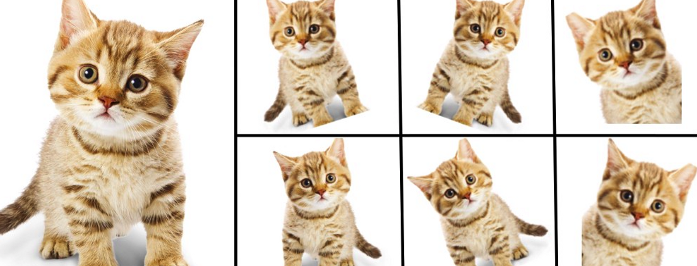

#### This code show the effect of circular roll on a vector   

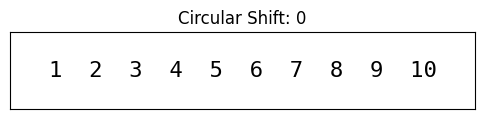

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate a simple 1D vector
vector = np.arange(1, 11)

# Create figure
fig, ax = plt.subplots(figsize=(6, 1))
ax.set_xticks([])
ax.set_yticks([])
text = ax.text(0.5, 0.5, "", fontsize=16, ha="center", va="center", family="monospace")

# Function to update the animation
def update(shift):
    shifted_vector = np.roll(vector, shift)  # Apply circular shift
    text.set_text("  ".join(map(str, shifted_vector)))  # Convert list to string format
    ax.set_title(f"Circular Shift: {shift}")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(0, 11), interval=500, repeat=True)

# Display animation
from IPython.display import HTML
HTML(ani.to_jshtml())


Train original model
----------------------
Epoch  1 | Train Error: 54.23% | Test Error: 64.20%
Epoch  2 | Train Error: 39.90% | Test Error: 55.60%
Epoch  3 | Train Error: 29.18% | Test Error: 49.80%
Epoch  4 | Train Error: 23.08% | Test Error: 45.10%
Epoch  5 | Train Error: 17.73% | Test Error: 44.90%
Epoch  6 | Train Error: 14.67% | Test Error: 42.40%
Epoch  7 | Train Error: 12.22% | Test Error: 39.40%
Epoch  8 | Train Error: 6.92% | Test Error: 38.70%
Epoch  9 | Train Error: 4.83% | Test Error: 39.10%
Epoch 10 | Train Error: 2.03% | Test Error: 37.10%
Epoch 11 | Train Error: 1.32% | Test Error: 38.00%
Epoch 12 | Train Error: 0.50% | Test Error: 37.10%
Epoch 13 | Train Error: 0.05% | Test Error: 35.80%
Epoch 14 | Train Error: 0.05% | Test Error: 35.90%
Epoch 15 | Train Error: 0.00% | Test Error: 36.10%
Epoch 16 | Train Error: 0.00% | Test Error: 36.10%
Epoch 17 | Train Error: 0.00% | Test Error: 36.10%
Epoch 18 | Train Error: 0.00% | Test Error: 36.50%
Epoch 19 | Train Error: 0.00% |

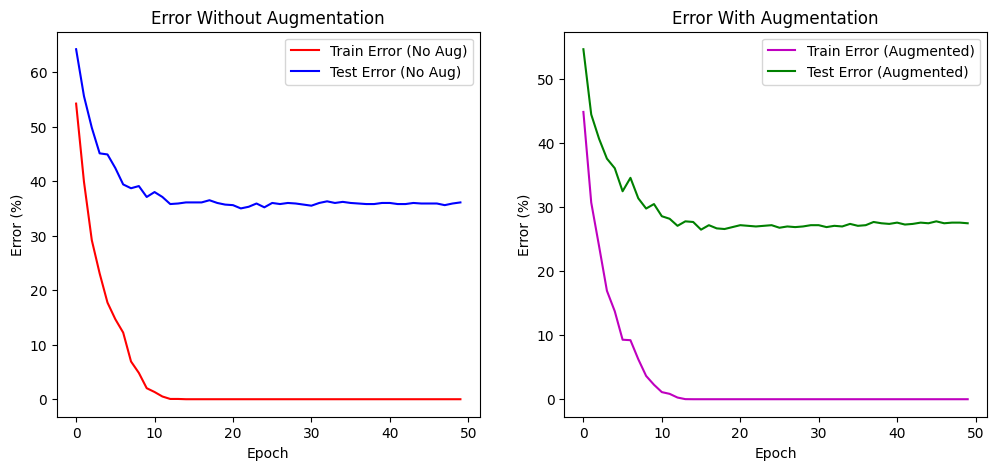

Final Test Accuracy Without Augmentation: 63.90%
Final Test Accuracy With Augmentation: 72.50%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import random
import matplotlib.pyplot as plt

# ----------------------
# Define model dimensions
# ----------------------
D_i = 40  # Input size for MNIST1D (number of features)
D_k = 256 # Hidden layer size (neurons in hidden layer)
D_o = 10  # Output classes (digits 0-9)

# ----------------------
# Define the neural network model
# ----------------------
model = nn.Sequential(
    nn.Linear(D_i, D_k),  # First fully connected layer
    nn.ReLU(),             # Activation function
    nn.Linear(D_k, D_k),   # Second fully connected layer
    nn.ReLU(),             # Activation function
    nn.Linear(D_k, D_o)    # Output layer (logits for 10 classes)
)

# ----------------------
# Function to initialize weights
# ----------------------
def weights_init(layer):
    if isinstance(layer, nn.Linear):
        nn.init.kaiming_uniform_(layer.weight)  # Kaiming initialization
        layer.bias.data.fill_(0.0)  # Set biases to zero

model.apply(weights_init)  # Apply weight initialization

# ----------------------
# Define loss function and optimizer
# ----------------------
loss_function = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)  # Stochastic Gradient Descent (SGD)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)  # Learning rate decay

# ----------------------
# Convert dataset to PyTorch tensors
# ----------------------
x_train = torch.tensor(data['x'].astype('float32'))  # Training inputs
y_train = torch.tensor(data['y'].astype('long'))     # Training labels
x_test = torch.tensor(data['x_test'].astype('float32'))  # Test inputs
y_test = torch.tensor(data['y_test'].astype('long'))     # Test labels

# Create a DataLoader for batch processing
batch_size = 100
train_dataset = TensorDataset(x_train, y_train)
data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ----------------------
# Training function
# ----------------------
n_epoch = 50  # Number of training epochs
def train_model(model, data_loader, x_train, y_train, x_test, y_test, errors_train, errors_test):
    for epoch in range(n_epoch):
        # Training loop (iterate over mini-batches)
        for x_batch, y_batch in data_loader:
            optimizer.zero_grad()  # Reset gradients
            pred = model(x_batch)  # Forward pass
            loss = loss_function(pred, y_batch)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

        # Compute errors after each epoch
        with torch.no_grad():
            pred_train = model(x_train)
            pred_test = model(x_test)
            _, predicted_train_class = torch.max(pred_train, 1)
            _, predicted_test_class = torch.max(pred_test, 1)
            errors_train[epoch] = 100 - 100 * (predicted_train_class == y_train).float().mean()
            errors_test[epoch] = 100 - 100 * (predicted_test_class == y_test).float().mean()

        # Print epoch results
        print(f"Epoch {epoch+1:2d} | Train Error: {errors_train[epoch]:.2f}% | Test Error: {errors_test[epoch]:.2f}%")

# Arrays to store error rates
errors_train = np.zeros(n_epoch)
errors_test = np.zeros(n_epoch)

# Train the model
print("Train original model")
print("----------------------")
train_model(model, data_loader, x_train, y_train, x_test, y_test, errors_train, errors_test)

# ----------------------
# Data Augmentation
# ----------------------
def augment(input_vector):
    augmented_vector = input_vector.copy()


    shift = np.random.randint(-2, 3)  # Random shift between -2 and 2

    augmented_vector = np.roll(augmented_vector, shift)  # Circular shift
    scale_factor = np.random.uniform(0.8, 1.2)  # Random scaling factor
    augmented_vector *= scale_factor  # Apply scaling
    return augmented_vector

# Create an augmented dataset
n_data_orig = data['x'].shape[0]  # Original dataset size
n_data_augment = n_data_orig + 4000  # Augment with 4000 additional samples
augmented_x = np.zeros((n_data_augment, D_i))  # Placeholder for augmented inputs
augmented_y = np.zeros(n_data_augment)  # Placeholder for augmented labels

# Copy original data
augmented_x[:n_data_orig, :] = data['x']
augmented_y[:n_data_orig] = data['y']

# Generate augmented samples
for i in range(n_data_orig, n_data_augment):
    random_idx = random.randint(0, n_data_orig - 1)  # Select a random sample
    augmented_x[i, :] = augment(data['x'][random_idx, :])  # Apply augmentation
    augmented_y[i] = data['y'][random_idx]  # Keep the same label

# Convert augmented dataset to tensors
x_train_aug = torch.tensor(augmented_x.astype('float32'))
y_train_aug = torch.tensor(augmented_y.astype('long'))

# Create DataLoader for augmented dataset
data_loader_aug = DataLoader(TensorDataset(x_train_aug, y_train_aug), batch_size=100, shuffle=True)

# Arrays to store error rates for augmented training
errors_train_aug = np.zeros(n_epoch)
errors_test_aug = np.zeros(n_epoch)

# Reinitialize model weights before training on augmented data
model.apply(weights_init)

# Train model with augmented data
print("\nTrain model with augmented data")
print("---------------------------------\n")
train_model(model, data_loader_aug, x_train_aug, y_train_aug, x_test, y_test, errors_train_aug, errors_test_aug)

# ----------------------
# Plot Results
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot errors without augmentation
axes[0].plot(errors_train, 'r-', label="Train Error (No Aug)")
axes[0].plot(errors_test, 'b-', label="Test Error (No Aug)")
axes[0].set_title("Error Without Augmentation")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Error (%)")
axes[0].legend()

# Plot errors with augmentation
axes[1].plot(errors_train_aug, 'm-', label="Train Error (Augmented)")
axes[1].plot(errors_test_aug, 'g-', label="Test Error (Augmented)")
axes[1].set_title("Error With Augmentation")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Error (%)")
axes[1].legend()

plt.show()

print(f"Final Test Accuracy Without Augmentation: {100 - errors_test[-1]:.2f}%")
print(f"Final Test Accuracy With Augmentation: {100 - errors_test_aug[-1]:.2f}%")


### Sources :

[Ch(9) Understanding deep learning Book , Simon](https://udlbook.github.io/udlbook/ )


[MNIST-1d paper](https://github.com/greydanus/mnist1d)

